In [ ]:
!pip install kaggle



Saving kaggle new.json to kaggle new (1).json
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:

from google.colab import files
files.upload()



In [ ]:

import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/



In [ ]:

!chmod 600 /root/.kaggle/kaggle.json





In [28]:
!kaggle datasets download -d charunisa/chatgpt-sentiment-analysis/file.csv


Dataset URL: https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis/versions/file.csv
License(s): CC0-1.0
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1754, in dataset_download_cli
    self.dataset_download_files(
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1656, in dataset_download_files
    request.dataset_version_number = dataset_version_number
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kagglesdk/kaggle_object.py", line 245, in __setattr__
    object.__setattr__(self, key, value)
  File "/usr/local/lib/python3.11/dist-packages/kagglesdk/datasets/types/dataset_api_se

In [36]:
import pandas as pd

df = pd.read_csv('/content/file.csv')

df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [37]:
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
df['labels'] = LabelEncoder().fit_transform(df['labels'])

In [40]:
df.drop('Unnamed: 0', axis=1, inplace=True)
x = df["tweets"]
y = df["labels"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(175435,)
(43859,)
(175435,)
(43859,)


In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)


In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

max_length = max([len(seq) for seq in x_train_seq])
x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=max_length)
x_test_pad = pad_sequences(x_test_seq, padding='post', maxlen=max_length)

print(x_train_pad.shape)
print(x_test_pad.shape)


(175435, 70)
(43859, 70)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [46]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming three classes (neutral, good, bad)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [47]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [50]:
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=64, validation_data=(x_test_pad, y_test))


Epoch 1/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 620s 226ms/step - accuracy: 0.5530 - loss: 0.9780 - val_accuracy: 0.8566 - val_loss: 0.4270
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 643s 234ms/step - accuracy: 0.8613 - loss: 0.4434 - val_accuracy: 0.8920 - val_loss: 0.3326
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 664s 227ms/step - accuracy: 0.8917 - loss: 0.3484 - val_accuracy: 0.8980 - val_loss: 0.3087
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 687s 229ms/step - accuracy: 0.8984 - loss: 0.3188 - val_accuracy: 0.8998 - val_loss: 0.3037
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 677s 228ms/step - accuracy: 0.9018 - loss: 0.3065 - val_accuracy: 0.9018 - val_loss: 0.2998
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 676s 226ms/step - accuracy: 0.9052 - loss: 0.2918 - val_accuracy: 0.9023 - val_loss: 0.2995
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 618s 224ms/step - accuracy: 0.9067 - loss: 0.2831 - val_accuracy: 0.9004 - val_loss: 0.2992
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 629s 227ms/step - ac

In [51]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1371/1371 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.9034 - loss: 0.3080
Test Accuracy: 90.44%


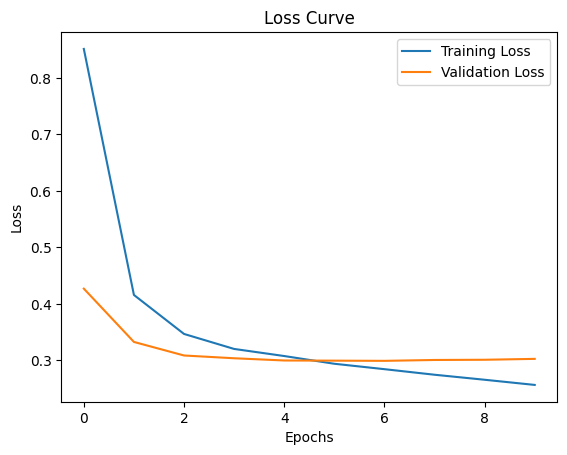

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


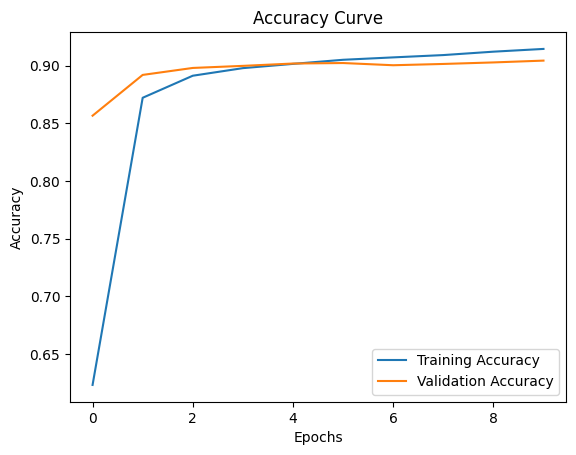

In [53]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


In [ ]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    prediction = model.predict(pad_seq)
    sentiment = ['neutral', 'good', 'bad']
    return sentiment[prediction.argmax()]

sample_text = "I love using ChatGPT, it's amazing!"
print(predict_sentiment(sample_text))
